# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [69]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [70]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [78]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path_coord = Path("../Pythonic_Monopoly/Data/neighborhoods_coordinates.csv")
coordinate_data = pd.read_csv(file_path_coord)



- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [82]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    housing_units = sfo_data["housing_units"]
    housing_units = housing_units.groupby([sfo_data.index]).mean()
    housing_units_fig = plt.figure()
    housing_units_plot = housing_units.plot.bar(x='year', ylim=[370000, 385000], title="Average Number of Housing Units Sold per Year")
    plt.close(housing_units_fig)
    return pn.pane.Matplotlib(housing_units_fig)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    gross_rent = sfo_data[["gross_rent"]]
    gross_rent_units = gross_rent.groupby('year').mean()
    gross_rent_fig = plt.figure()
    gross_rent_plot = gross_rent_units.plot.line(x="year", y="gross_rent", title="Gross Rent per Year")
    plt.close(gross_rent_fig)
    return pn.pane.Matplotlib(gross_rent_fig)



def average_sales_price():
    """Average Sales Price Per Year."""
    
    sqt_foot = sfo_data[["sale_price_sqr_foot"]]
    sqt_foot_units = sqt_foot.groupby('year').mean()
    sale_price_fig = plt.figure()
    sale_price_plot = sqt_foot_units.plot.line(x="year", y="sale_price_sqr_foot", title="Average Sales Price per Square Foot Annually")
    plt.close(sale_price_fig)
    return pn.pane.Matplotlib(sale_price_fig)



def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    avg_price = neighborhood_data["neighborhood"]
    neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
    avg_price_fig = plt.figure()
    avg_price_plot = neighborhood.hvplot.line(
                        x="year",
                        y="sale_price_sqr_foot",
                        groupby="neighborhood",
                        xlabel="Year",
                        ylabel="Average Price per SqFt by Year",
                        ylim=(100, 800))
    plt.close(avg_price_fig)
    return pn.pane.Matplotlib(avg_price_fig)



def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    neighborhood_sales = sfo_data.groupby(["neighborhood"], as_index=False).mean()
    top_ten = neighborhood_sales.nlargest(10, "sale_price_sqr_foot").round(2)
    top_ten_fig = plt.figure()
    top_ten_plot = top_ten.hvplot.bar(x="neighborhood",
                   y="sale_price_sqr_foot",
                   rot=60,
                   title="Top 10 Most Expensive Neighborhoods in SFO",
                   xlabel="Neighborhood",
                   ylabel="Avg. Sale Price per Square Foot",
                   ylim=(100, 1000))
    plt.close(top_ten_fig)
    return pn.pane.Matplotlib(top_ten_fig)


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
    compare_fig = plt.figure()
    compare_plot = neighborhood.hvplot.bar(
                        x="year",
                        y=["gross_rent","sale_price_sqr_foot"],
                        groupby="neighborhood",
                        xlabel="Year/Neighborhood",
                        ylabel="Num Housing Units",
                        rot=60,
                        title="Comparing Cost to Purchase vs Rental Income")
    plt.close(compare_fig)
    return pn.pane.Matplotlib(compare_fig)

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    """Neighborhood Map."""

    avg_neighborhood = sfo_data.groupby(["neighborhood"]).mean()
    avg_neighborhood.reset_index(inplace=True)
    avg_locations = pd.concat([coordinate_data, avg_neighborhood], axis="columns", join="inner")
    avg_locations.drop(columns="neighborhood", inplace=True)
    map_fig = plt.figure()
    map_plot = px.scatter_mapbox(
                    avg_locations,
                    lat="Lat",
                    lon="Lon",
                    size="sale_price_sqr_foot",
                    color="gross_rent",
                    zoom=10,
                    title="Average Prices in San Francisco")
    plt.close(map_fig)
    return pn.pane.Matplotlib(map_fig)


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [87]:
# Create a Title for the Dashboard
title = '# San Francisco Rental Price Visualizations'
welcome_tab = pn.Row(pn.Column(title), neighborhood_map())
market_analysis_row = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())
# Create a tab layout for the dashboard
neighborhood_analysis_tab = pn.Column(interact(average_price_by_neighborhood()),
    top_most_expensive_neighborhoods(),
    most_expensive_neighborhoods_rent_sales()
                                     )



# Create the dashboard
dashboard = pn.Tabs(("welcome", welcome_tab),
("Yearly Analysis", market_analysis_row),
("Neighborhood Market", neighborhood_analysis_tab))

KeyError: 'year'

<Figure size 432x288 with 0 Axes>

## Serve the Panel Dashboard

Column
    [0] Markdown(str)
    [1] Str(tuple, name='Averages by Household')
    [2] Str(tuple, name='Neighborhoods')
    [3] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure)
    [4] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure)
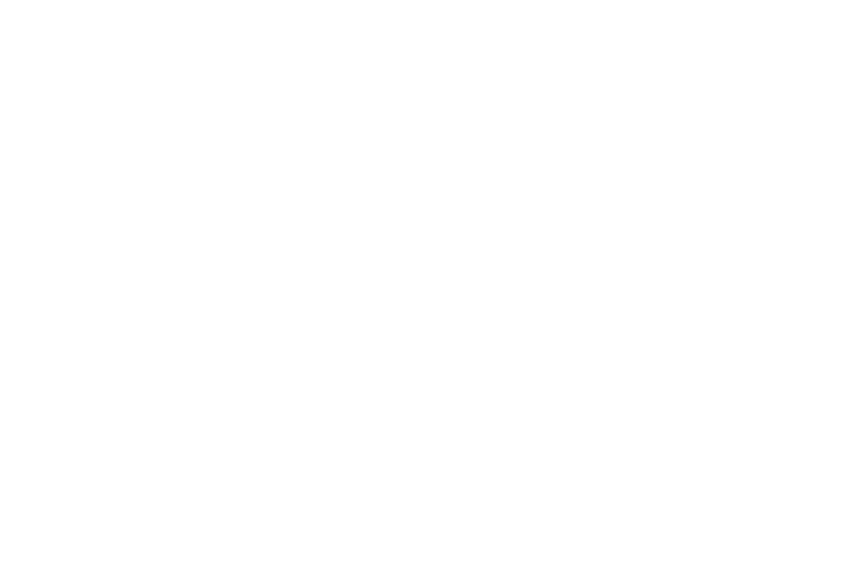
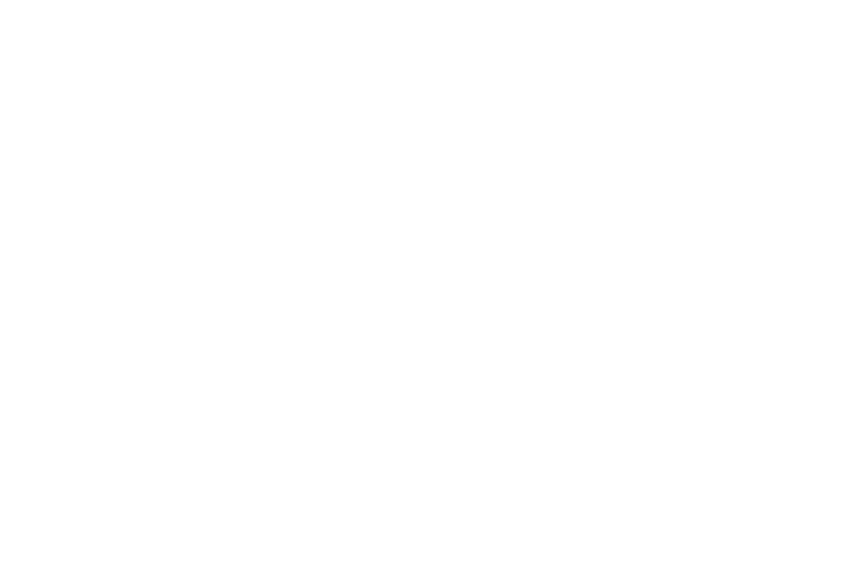

In [88]:
# Serve the# dashboard
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()